In [3]:
library(dplyr)
library(tibbletime)
library(tidyverse)
library(anomalize)

#setwd("C:/coding/R/anomalize/")

logs <- read_csv("https://raw.githubusercontent.com/holisticinfosec/toolsmith_R/master/anomalize/log.csv")

security_access_logs <- logs %>%
  group_by(server) %>%
  as_tbl_time(date)

security_access_logs

Parsed with column specification:
cols(
  date = col_date(format = ""),
  count = col_integer(),
  server = col_character()
)


date,count,server
2017-05-22,7,SERVER-549521
2017-05-23,9,SERVER-549521
2017-05-24,12,SERVER-549521
2017-05-25,4,SERVER-549521
2017-05-26,4,SERVER-549521
2017-05-30,2,SERVER-549521
2017-05-31,10,SERVER-549521
2017-06-01,14,SERVER-549521
2017-06-02,12,SERVER-549521
2017-06-05,7,SERVER-549521


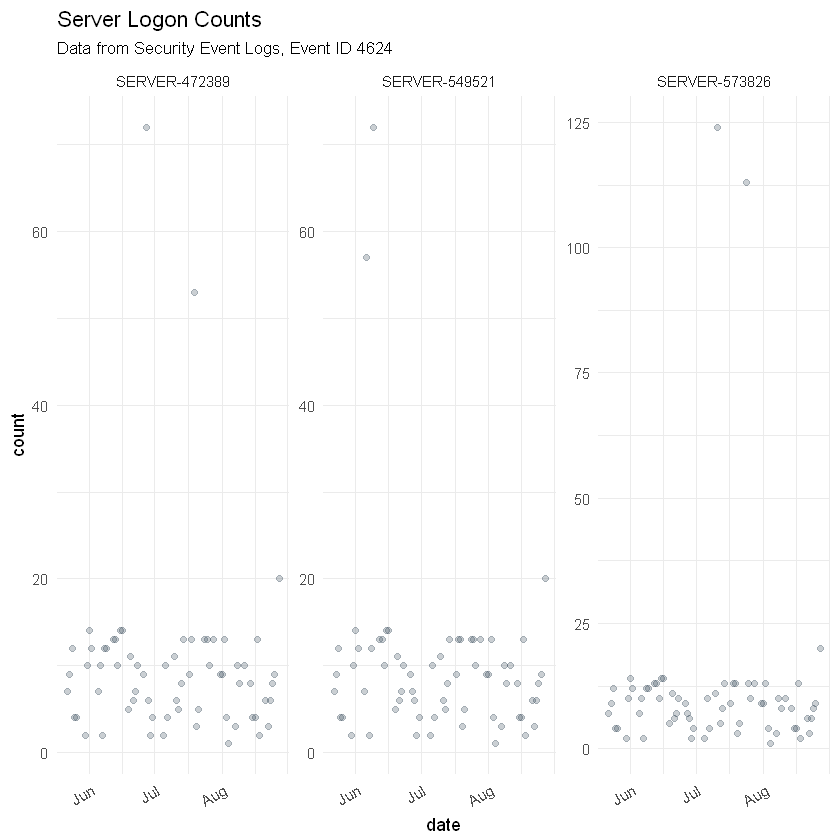

In [4]:
security_access_logs %>%
  ggplot(aes(date, count)) +
  geom_point(color = "#2c3e50", alpha = 0.25) +
  facet_wrap(~ server, scale = "free_y", ncol = 3) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
  labs(title = "Server Logon Counts",
       subtitle = "Data from Security Event Logs, Event ID 4624")

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

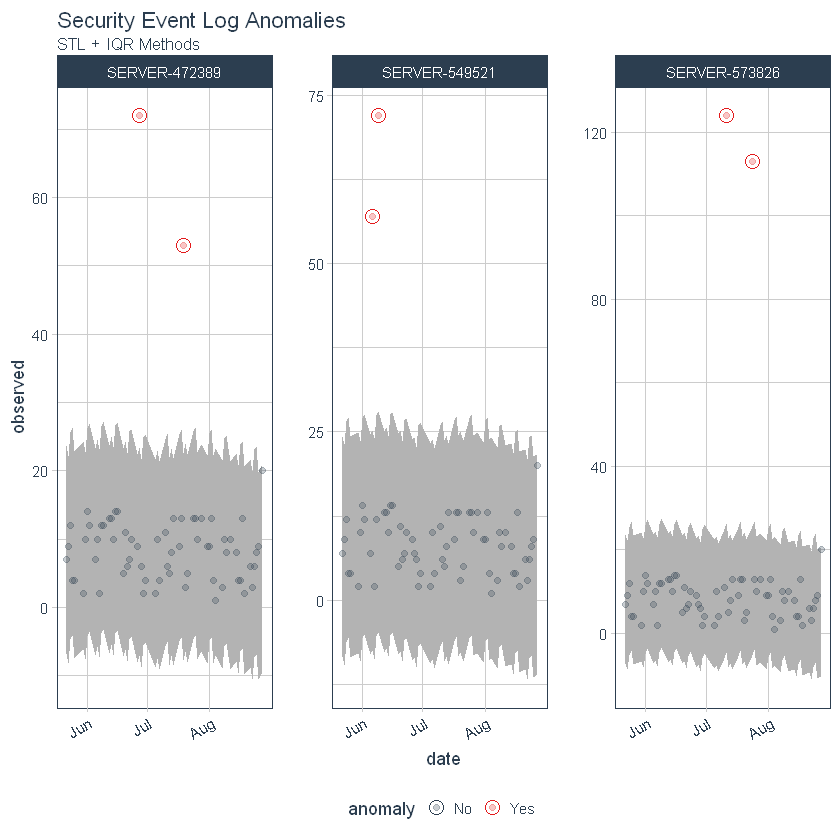

In [5]:
security_access_logs %>%
  # Data Manipulation / Anomaly Detection
  time_decompose(count, method = "stl") %>%
  anomalize(remainder, method = "iqr") %>%
  time_recompose() %>%
  # Anomaly Visualization
  plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.25) +
  labs(title = "Security Event Log Anomalies", subtitle = "STL + IQR Methods") 

frequency = 5 days
median_span = 33 days


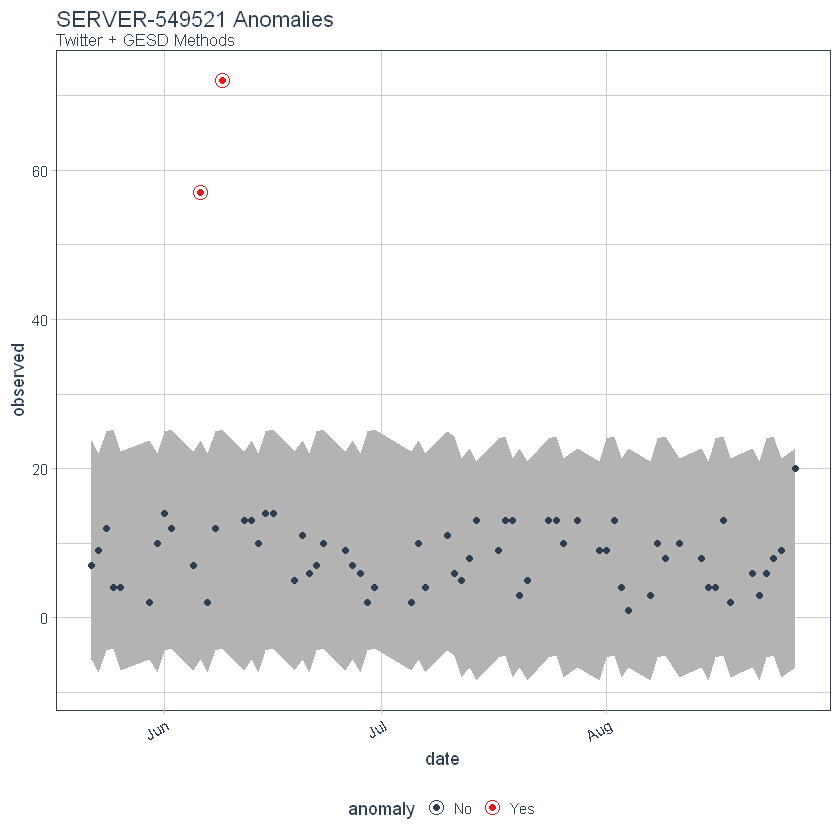

In [6]:
# Get only SERVER549521 access
SERVER549521 <- security_access_logs %>%
  filter(server == "SERVER-549521") %>% 
  ungroup()

# Anomalize!!
SERVER549521 %>%
  # Twitter + GESD
  time_decompose(count, method = "twitter", trend = "3 months") %>%
  anomalize(remainder, method = "gesd") %>%
  time_recompose() %>%
  # Anomaly Visualziation
  plot_anomalies(time_recomposed = TRUE) +
  labs(title = "SERVER-549521 Anomalies", subtitle = "Twitter + GESD Methods")

frequency = 5 days
trend = 33 days


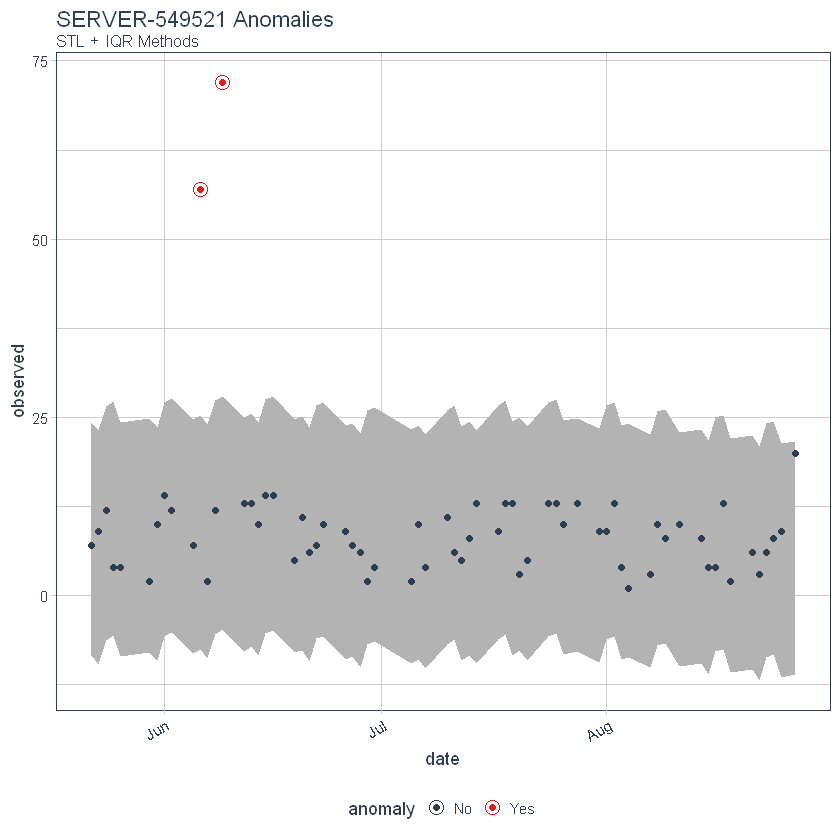

In [7]:
SERVER549521 %>%
  # STL + IQR Anomaly Detection
  time_decompose(count, method = "stl", trend = "3 months") %>%
  anomalize(remainder, method = "iqr") %>%
  time_recompose() %>%
  # Anomaly Visualization
  plot_anomalies(time_recomposed = TRUE) +
  labs(title = "SERVER-549521 Anomalies", subtitle = "STL + IQR Methods")

frequency = 5 days
trend = 33 days


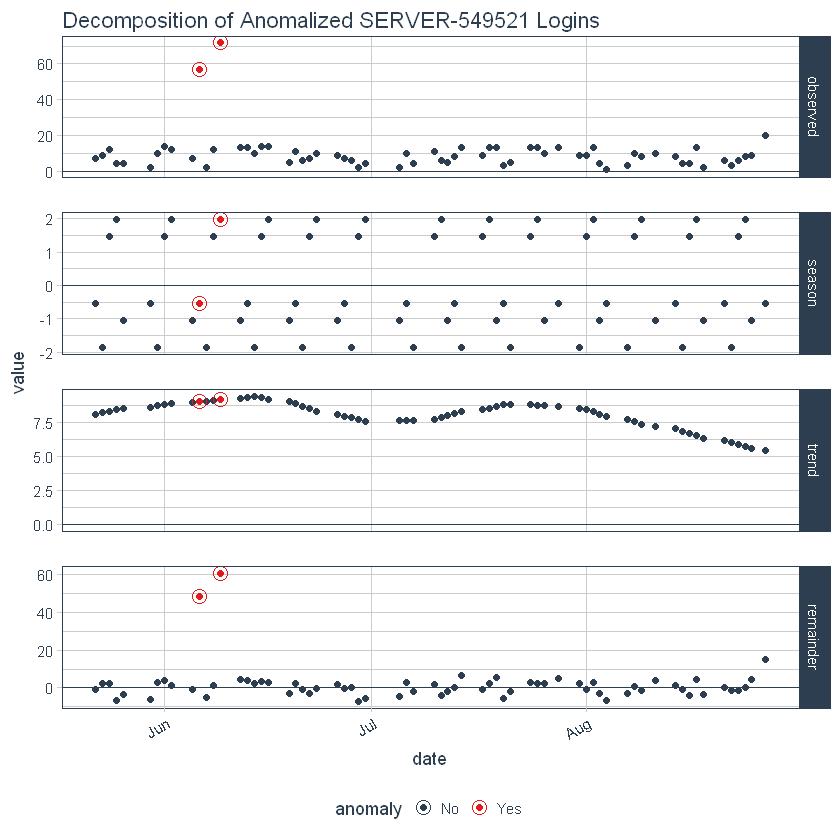

In [8]:
security_access_logs %>%
  filter(server == "SERVER-549521") %>%
  ungroup() %>%
  time_decompose(count) %>%
  anomalize(remainder) %>%
  plot_anomaly_decomposition() +
  labs(title = "Decomposition of Anomalized SERVER-549521 Logins")